# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание проекта
Предоставлены данные с сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача заключается в установлении параметров, которые в дальнейшем будут использоваться для постройки автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

### Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Содержание проекта
1. <a href='#step-1'>Открытие файла и изучение общей информации.</a> 
2. <a href='#step-2'>Предобработка полученных данных.</a>
3. <a href='#step-3'>Подсчёт и добавление в таблицу дополнительных параметров.</a>
4. <a href='#step-4'>Проведение исследовательского анализа данных.</a>
5. <a href='#step-5'>Общий вывод.</a>

### <a id='step-1'> Шаг 1. Откройте файл с данными и изучите общую информацию.</a> 

In [1]:
# Импортируем pandas, matplotlib и изучим общую информацию.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(f'Длина таблицы: {len(df)}')
df.info()
df.head(10)

Длина таблицы: 23699
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null fl

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучая данные, можно заметить, что во множестве столбцов есть множество отсутствующих значений, но не все их них являются пропущенными. Например, *NaN* в столбцах вроде *'balcony'*, *'airports_nearest'* и *'parks_around3000'* может означать именно отсутствие (нет балкона в квартире, аэропортов или парков поблизости) или в случае столбца *'days_exposition'*, что объявление всё ещё активно. Нам надо определить, какие *NaN* оставить, сбросить или заполнить. Также необходимо перевести тип данных стоблцов из *float* в *int* там, где это возможно, чтобы избавиться от хвостов, и в *datetime* в стоблце 'first_day_exposition'. В столбце *'locality_name'* для Санкт-Петербурга пропущенные значения можно заполнить нулями, так как скорее всего это значит, что квартира находится в центре.

### <a id='step-2'>Шаг 2. Предобработка данных.</a>

In [2]:
# Ограничиваем показ знаков после запятой двумя.
pd.options.display.float_format = '{:.2f}'.format

# Начнём приводить данные в порядок слева направо. 
# Приведём цену к миллионам рублей для упрощения работы.
df['last_price'] = df['last_price'] / 1000000

# Изменим тип данных в столбце 'first_day_exposition' на datetime.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Заполним пропуски в 'balcony' и изменим тип данных на int.
df['balcony'] = df['balcony'].fillna(value=0).astype('int')

# В этих столбцах количество пропусков крайне мало относительно всего датафрейма,
# их можно сбросить.
df.dropna(axis='rows', subset=['locality_name', 'floors_total'], inplace=True)
df.reset_index(drop=True)

# Изменим тип данных на int.
df['floors_total'] = df['floors_total'].astype('int')

# Заполним пропуски в 'ceiling_height' медианой, соответствующей количеству этажей.
ceiling_height_median = df.groupby('floors_total')['ceiling_height'].median()
floors_total_unique = df['floors_total'].unique()
for unique in floors_total_unique:
    df.loc[df.loc[:, 'floors_total']==unique, 'ceiling_height'] = df[df['floors_total'] == unique]['ceiling_height'].fillna(ceiling_height_median[unique])

# Заполним пропуски в 'is_apartment' значением False. Исходим из того,
# что большинство квартир не являются апартаментами 
df['is_apartment'] = df['is_apartment'].fillna(value=False)

# Заполним пропуски и переведём в int, где это возможно.
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype('int')
df['days_exposition'] = df['days_exposition'].fillna(value=0).astype('int')
df.loc[df.loc[:,'locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = df[df['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].fillna(value=0)

# Посчитаем дубликаты и удалим, если есть.
print(f"Количество дубликатов: {df.duplicated().sum()}.")
df.info()
print(df.isnull().sum())
df.head(15)

Количество дубликатов: 0.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23564 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18124 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-n

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,0
1,7,3.35,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0,nan,0,nan,81
2,10,5.20,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558
3,0,64.90,159.00,2015-07-24,3,2.60,14,nan,9,False,...,nan,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121
5,10,2.89,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,nan,nan,0,nan,0,nan,55
6,6,3.70,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.00,19143.00,0,nan,0,nan,155
7,5,7.92,71.60,2019-04-18,2,2.75,24,nan,22,False,...,18.90,2,Санкт-Петербург,23982.00,11634.00,0,nan,0,nan,0
8,20,2.90,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,8.81,0,посёлок Мурино,nan,nan,0,nan,0,nan,189
9,18,5.40,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.00,15008.00,0,nan,0,nan,289


### Вывод

В ходе проведения предобработки данных были заполнены пропуски по различным признакам там, где это было возможно и объективно. Также была проведена работа с типами данных некоторых признаков.

### <a id='step-3'>Шаг 3. Посчитайте и добавьте в таблицу.</a>

In [3]:
# Создаём столбцец для цены за квадратный метр.
df['sq_meter_price'] = (df['last_price'] / df['total_area'] * 1000000).astype('int')

# Создаём столбцы для обозначение дня недели, месяца и года и 
# меняем численные значения на названия дней и месяцев.
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['day_of_week'] = df['day_of_week'].replace(range(0, 7), days)
df['month'] = df['month'].replace(range(1, 13), months)
df['year'] = df['first_day_exposition'].dt.year


# Создаём функцию для определения этажа квартиры.
def what_floor(row):
    """
    Возвращает значение в зависимости от того, 
    на каком этаже находится квартира по правилам:
    - 'Первый', если квартира находится на первом этаже.
    - 'Последний', если этаж совпадает с количеством этажей в доме.
    - 'Другой' в прочих случаях.
    """
    floors = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'Первый'
    
    if floor == floors:
        return 'Последний'
    
    return 'Другой'

# Создаём стобец и применяем функцию.
df['what_floor'] = df.apply(what_floor, axis=1)

# Создаём столбцы для соотношения жилой площади и площади кухни
# к общей площади квартиры.
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23564 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18124 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around30

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day_of_week,month,year,what_floor,living_area_ratio,kitchen_area_ratio
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,0,120370,Четверг,Март,2019,Другой,0.47,0.23
1,7,3.35,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,0,nan,81,82920,Вторник,Декабрь,2018,Первый,0.46,0.27
2,10,5.20,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,2,574.00,558,92785,Четверг,Август,2015,Другой,0.61,0.15
3,0,64.90,159.00,2015-07-24,3,2.60,14,nan,9,False,...,3,234.00,424,408176,Пятница,Июль,2015,Другой,nan,nan
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121,100000,Вторник,Июнь,2018,Другой,0.32,0.41
5,10,2.89,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,nan,55,95065,Понедельник,Сентябрь,2018,Другой,0.47,0.30
6,6,3.70,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,0,nan,155,99195,Четверг,Ноябрь,2017,Другой,0.28,0.39
7,5,7.92,71.60,2019-04-18,2,2.75,24,nan,22,False,...,0,nan,0,110544,Четверг,Апрель,2019,Другой,nan,0.26
8,20,2.90,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,nan,189,87454,Среда,Май,2018,Другой,0.47,0.27
9,18,5.40,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,nan,289,88524,Воскресенье,Февраль,2017,Другой,0.71,0.11


### <a id='step-4'>Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:</a>

#### Изучим параметры площади, цены, числа комнат и высоты потолков.

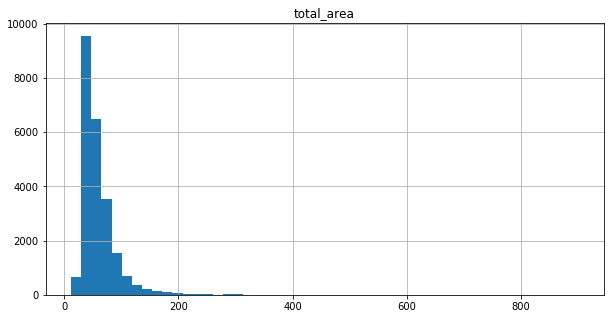

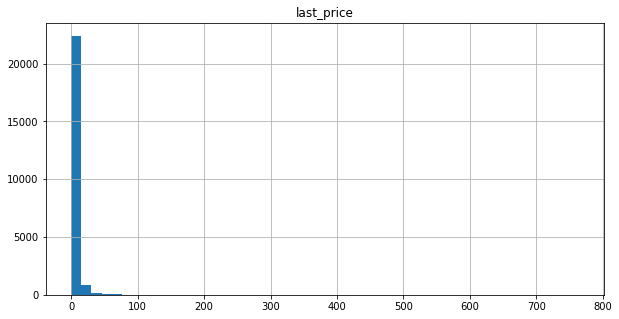

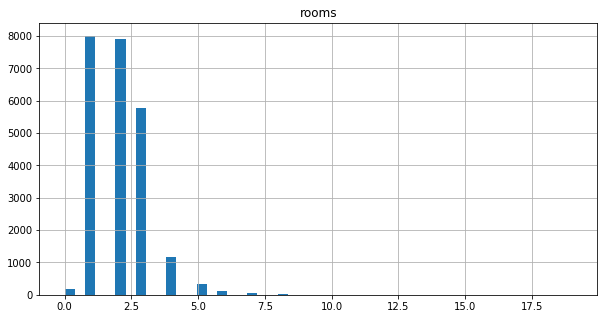

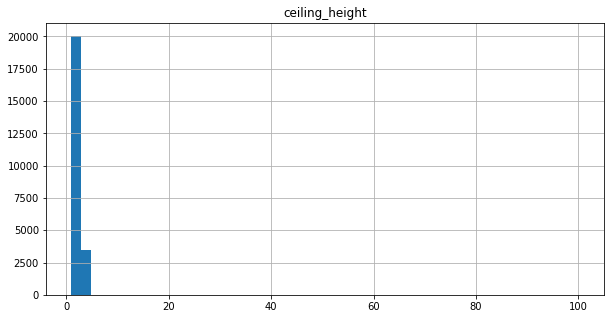

In [4]:
# Создадим гистограммы для нужных параметров.
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in columns:
    df.hist(column=column, bins=50, figsize=(10, 5))

#### Изучим время продажи квартиры, посчитаем среднее и медиану.

Среднее время продажи квартиры: 156
Медианное время продажи квартиры: 73


Text(0, 0.5, 'Количество проданных квартир')

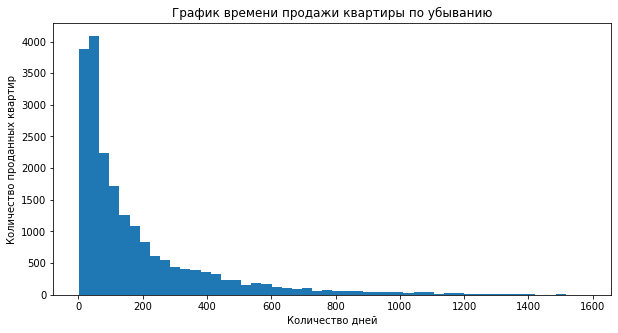

In [5]:
# Изучим время продажи квартиры
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()
print(f'Среднее время продажи квартиры: {mean_days:.0f}')
print(f'Медианное время продажи квартиры: {median_days:.0f}')

# Выделим проданные квартиры (с закрытыми объявлениями)
# и построим гистограмму по времени продажи.
sold_realty = df.query('days_exposition > 0')
sold_realty_plot = sold_realty['days_exposition'].plot(
    title='График времени продажи квартиры по убыванию', kind='hist', bins=50, figsize=(10, 5))
sold_realty_plot.set_xlabel("Количество дней")
sold_realty_plot.set_ylabel("Количество проданных квартир")

Параметры "типичной квартиры":
	Площадь: 50.00 м2
	Цена: 4.50 млн. рублей
	Количество комнат: 2
	Высота потолков: 2.65


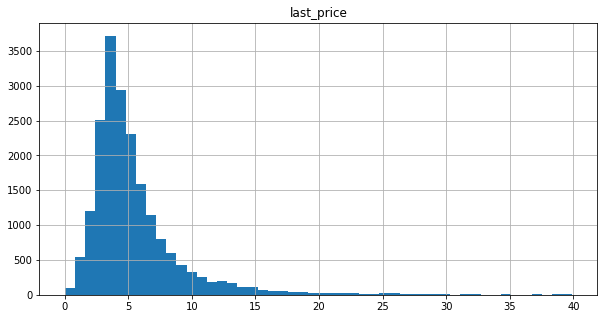

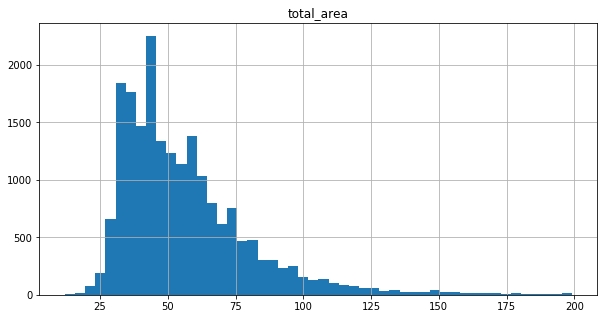

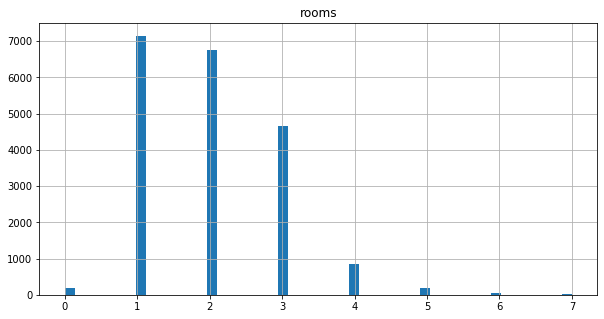

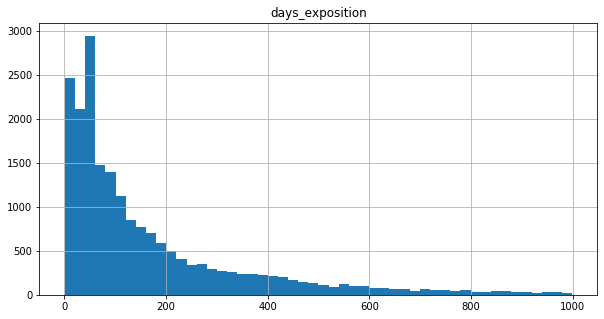

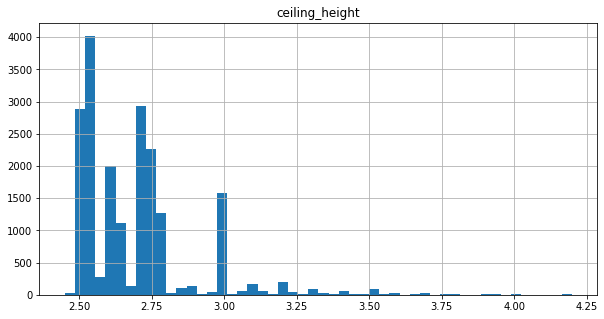

In [6]:
# Уберём редкие и выбивающиеся значения.
condition = 'total_area < 200 and last_price < 40 and rooms < 8 and (2.4 < ceiling_height < 4.25) and (0 < days_exposition < 1000)'
data_cleaned = df.query(condition)
data_cleaned.reset_index(drop=True)

# Выведем параметры "типичной квартиры."
print('Параметры "типичной квартиры":')
print(f"\tПлощадь: {data_cleaned['total_area'].median():.2f} м2")
print(f"\tЦена: {data_cleaned['last_price'].median():.2f} млн. рублей")
print(f"\tКоличество комнат: {data_cleaned['rooms'].median():.0f}")
print(f"\tВысота потолков: {data_cleaned['ceiling_height'].median()}")
columns = ['last_price', 'total_area', 'rooms', 'days_exposition', 'ceiling_height']
for column in columns:
    data_cleaned.hist(column=column, bins=50, figsize=(10, 5))

#### Промежуточный вывод
- Можно заметить, что пик приходится на количество значений от 50 до 60 дней. Большая часть квартир продаётся уже в течение 100 дней. Количество квартир, которые долго не продаются, постепенно уменьшается при увеличении количества дней. Можно считать, что квартиры продаются необычно долго, если объявлению больше 1000 дней, после этой цифры график постепенно сливается с нулём.

#### Какие факторы влияют на стоимость квартиры?

Коэффицент корреляции для total_area: 0.77
Коэффицент корреляции для rooms: 0.48
Коэффицент корреляции для cityCenters_nearest: -0.34


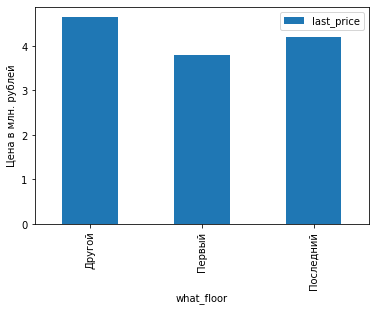

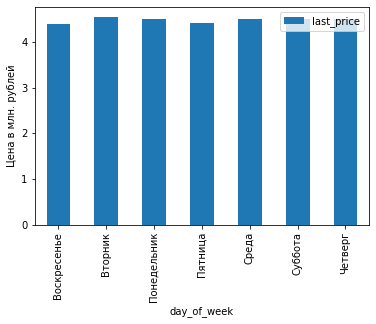

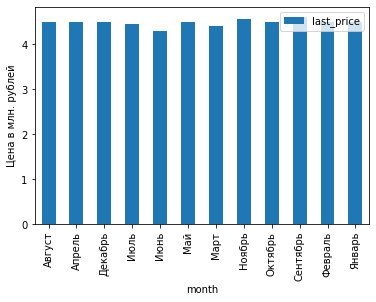

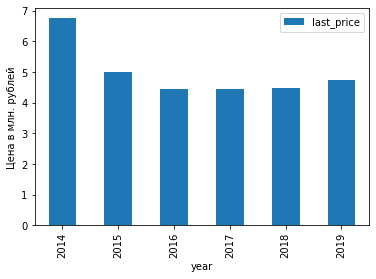

In [7]:
# Рассчитаем коэффициент корреляции Пирсона, чтобы узнать, 
# зависит ли цена от площади, числа комнат, удалённости от центра.
params=['total_area', 'rooms', 'cityCenters_nearest']
for param in params:
    print(f"Коэффицент корреляции для {param}: {data_cleaned['last_price'].corr(data_cleaned[param]):.2f}")

# Посмотрим, если ли различие между ценами на квартиры
# на различных этажах (первый, последний, другой).
what_floor_plot = data_cleaned.pivot_table(
    index='what_floor', values='last_price', aggfunc='median').plot(kind='bar')
what_floor_plot.set_ylabel('Цена в млн. рублей')

# Изучим зависимость цены от дня недели, месяца и года.
# Посмотрим, сильно ли различается медианная цена в разные периоды.
date_columns = ['day_of_week', 'month', 'year']
for column in date_columns:
    data_cleaned.pivot_table(index=column, values='last_price', aggfunc='median').plot(
        kind='bar').set_ylabel('Цена в млн. рублей')

#### Промежуточный вывод
- Коэффицент корреляции указывает нам, что зависимость между количеством комнат и ценой, и близостью к центру и ценой почти не такая явная. Но можно утверждать, что имеется заметная зависимость между общей площадью квартиры и ценой на неё.
- На первом этаже квартиры чаще продаются дешевле, чем на других этажах, а дороже всего продаются квартиры, не находящиеся на первом или последнем этаже. Особой связи между ценой и днём недели или месяцем не обнаружено, медианные значения примерно одинаковы. Но было обнаружено, что в 2014 году цены были гораздо выше, в 2015 году цены резко упали и продолжили снижаться до 2016, после чего не менялись до роста в 2019.

#### Средняя цена квадратного метра в топ-10 населённых пунктов с самым большим количеством объявлений.

,locality_name,locality_count,sq_meter_price
0,Санкт-Петербург,13108,109278.55
1,посёлок Мурино,508,85828.42
2,посёлок Шушары,403,77797.54
3,Всеволожск,335,68622.66
4,Колпино,304,74719.42
5,посёлок Парголово,300,89590.95
6,Пушкин,295,102129.78
7,деревня Кудрово,294,92421.06
8,Гатчина,267,67938.01
9,Выборг,204,57094.83


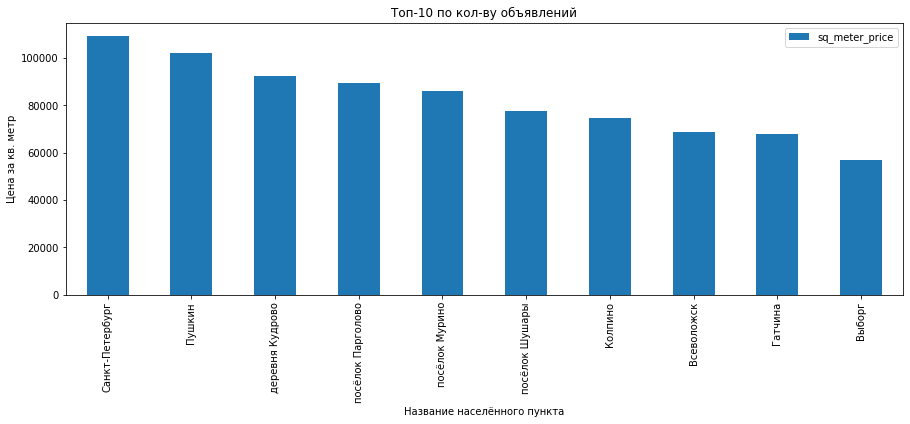

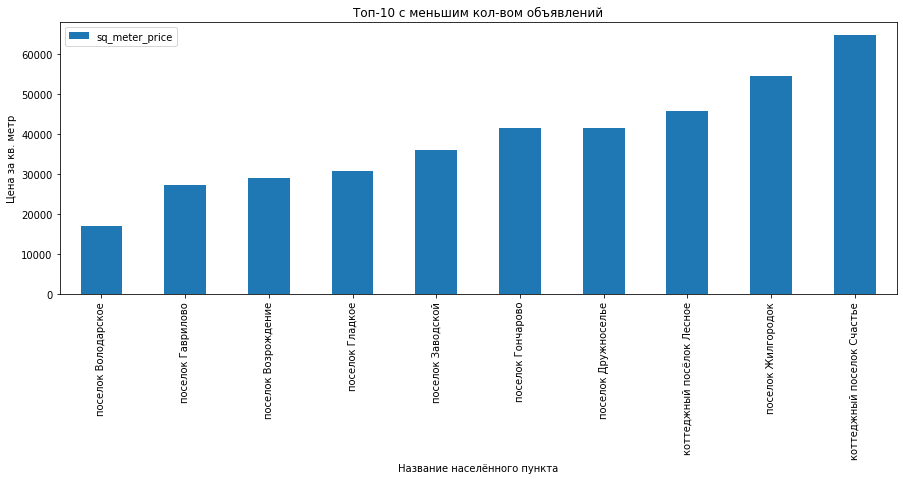

In [8]:
# Сохраним топ-10 населённых пунктов по объявлениям.
locality_top = data_cleaned.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
locality_top = locality_top.to_frame()
locality_top.columns = ['locality_count']

# Топ-10 населённых пунктов с самым маленьким количеством объявлений.
locality_bottom = data_cleaned.groupby('locality_name')['locality_name'].count().sort_values()[:10]
locality_bottom = locality_bottom.to_frame()
locality_bottom.columns = ['locality_count']

# Рассчитаем среднюю цену квадратного метра для населённых пунктов.
locality_sq_meter_price = data_cleaned.pivot_table(index='locality_name', values='sq_meter_price')

# Объединим данные из двух верхних таблиц, чтобы отобразить среднюю цену за кв. м. по топ-10 пунктам.
locality_top_sq_meter_price = locality_top.join(locality_sq_meter_price, on='locality_name')
locality_bottom_sq_meter_price = locality_bottom.join(locality_sq_meter_price, on='locality_name')
locality_top_sq_meter_price.reset_index(level=0, inplace=True)
locality_bottom_sq_meter_price.reset_index(level=0, inplace=True)

sq_meter_top_plot = locality_top_sq_meter_price.sort_values(
    by='sq_meter_price', ascending=False).plot(
    title='Топ-10 по кол-ву объявлений', x='locality_name', y='sq_meter_price', kind='bar', figsize=(15, 5))
sq_meter_bottom_plot = locality_bottom_sq_meter_price.sort_values(
    by='sq_meter_price').plot(
    title='Топ-10 с меньшим кол-вом объявлений', x='locality_name', y='sq_meter_price', kind='bar', figsize=(15, 5))
sq_meter_top_plot.set_xlabel('Название населённого пункта')
sq_meter_top_plot.set_ylabel('Цена за кв. метр')

sq_meter_bottom_plot.set_xlabel('Название населённого пункта')
sq_meter_bottom_plot.set_ylabel('Цена за кв. метр')

locality_top_sq_meter_price

#### Промежуточный вывод
- В топ-10 населённных пунктов по количеству объявлений самую высокую среднюю цену за квадратный метр имеет Санкт-Петербург, самую низкую — Выборг. При этом, данные параметры в этих двух городах различаются почти в два раза!

#### Какая область входит в центр Санкт-Петербурга?

Text(0, 0.5, 'Цена в рублях')

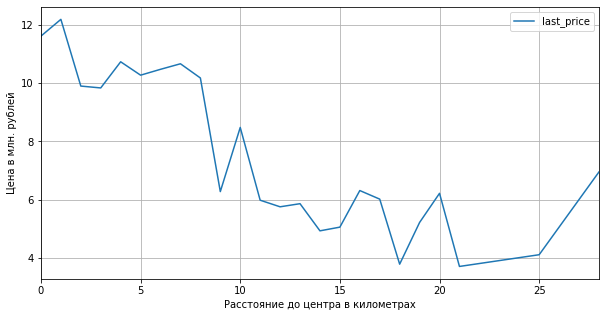

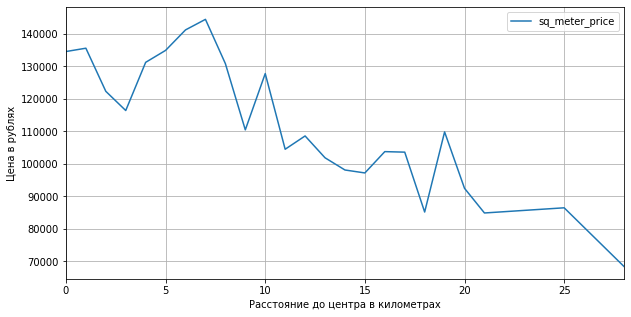

In [9]:
# Сохраним всю недвижимость, находящуюся в Петербурге, в отдельную переменную.
realty_spb = data_cleaned.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
realty_spb.dropna(inplace=True)

# Добавим столбец, отображающий расстояние в километрах и округлим его до целых.
realty_spb['cityCenters_nearest_km'] = (realty_spb['cityCenters_nearest'] / 1000).astype('int')

# Выведем график, отображающий зависимость цены от удалённости от центра (общая цена и цена за кв. метр).
price_plot = realty_spb.pivot_table(
    index='cityCenters_nearest_km', values='last_price'
    ).reset_index().plot(x='cityCenters_nearest_km', y='last_price', grid=True, figsize=(10, 5))
price_plot.set_xlabel('Расстояние до центра в километрах')
price_plot.set_ylabel('Цена в млн. рублей')

sq_meter_price_plot = realty_spb.pivot_table(
    index='cityCenters_nearest_km', values='sq_meter_price'
    ).reset_index().plot(x='cityCenters_nearest_km', y='sq_meter_price', grid=True, figsize=(10, 5))
sq_meter_price_plot.set_xlabel('Расстояние до центра в километрах')
sq_meter_price_plot.set_ylabel('Цена в рублях')

#### Промежуточный вывод
- В центр Санкт-Петербурга входит область удалённости до 11 км: после этого значения средняя цена за квадратный метр резко начинает повышаться, как и просто цена.

Коэффицент корреляции для rooms: 0.02 (по городу)
Коэффицент корреляции для rooms: 0.47 (в центре)
Коэффицент корреляции для total_area: 0.01 (по городу)
Коэффицент корреляции для total_area: 0.75 (в центре)
Коэффицент корреляции для cityCenters_nearest_km: -0.06 (по городу)
Коэффицент корреляции для cityCenters_nearest_km: -0.25 (в центре)
Средняя цена по городу в млн: 7.87 и по центру: 9.37
Средняя площадь по городу: 65.79 и по центру: 73.14
Средняя высота потолков по городу: 2.78 и по центру: 2.86


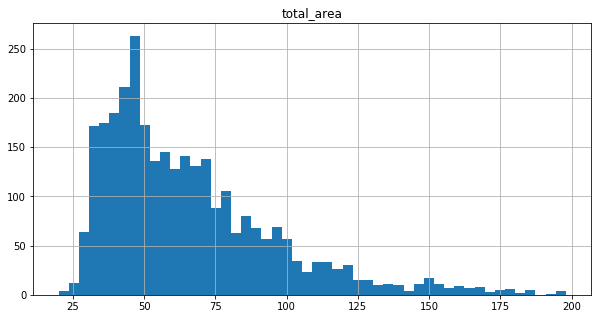

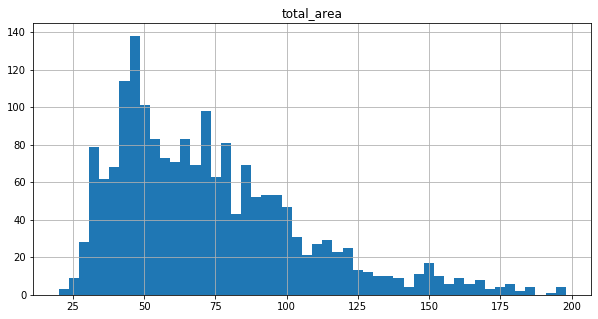

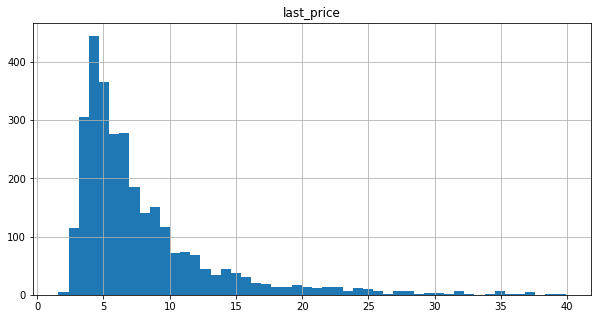

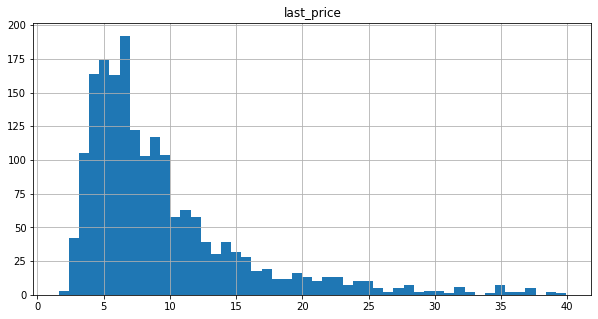

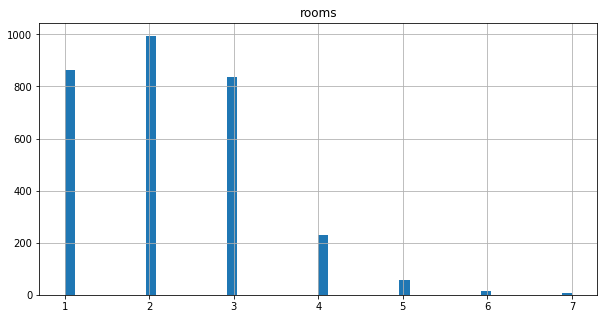

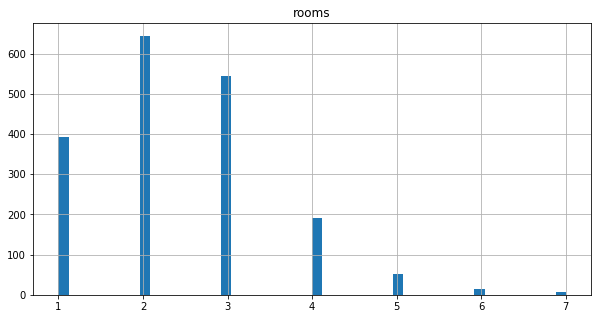

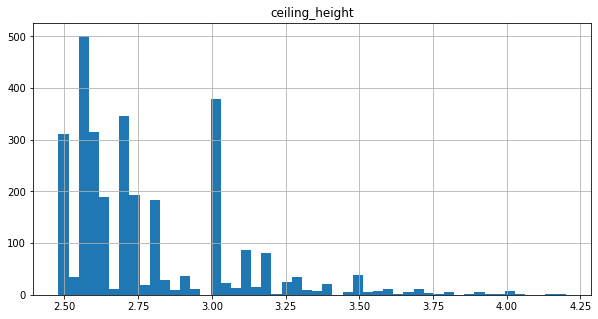

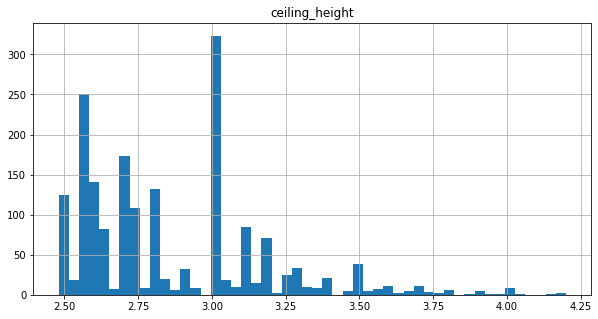

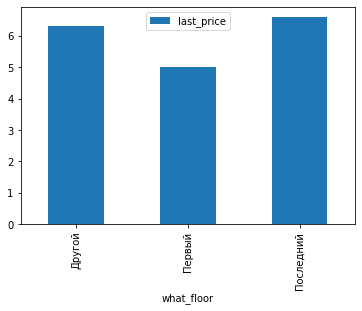

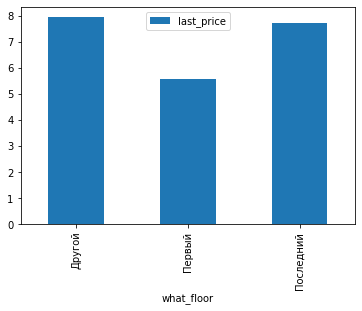

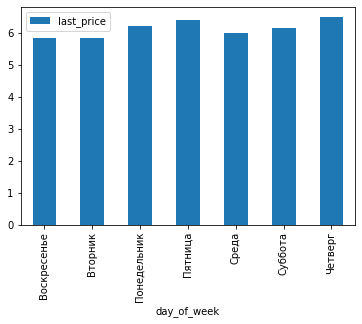

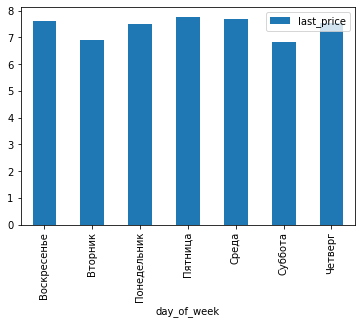

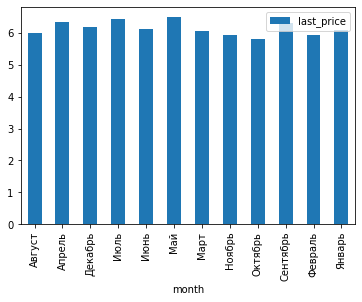

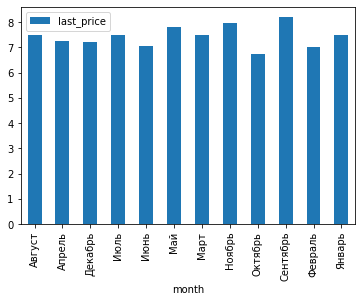

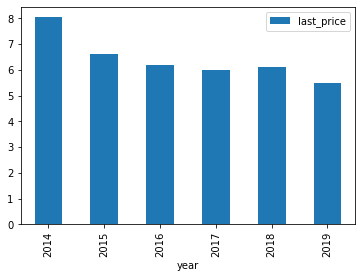

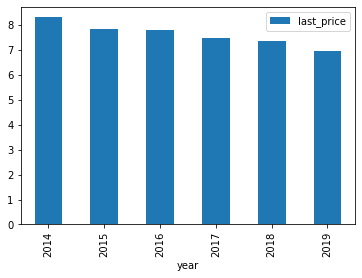

In [11]:
# Выделяем недвижимость, находящуюся в центре Санкт-Петербурга.
realty_spb_center = realty_spb.query('cityCenters_nearest_km <= 11').reset_index(drop=True)

# Построим гистограммы по параметрам для города в целом и центра.
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in columns:
    realty_spb.hist(column=column, bins=50, figsize=(10, 5))
    realty_spb_center.hist(column=column, bins=50, figsize=(10, 5))

# Рассчитаем коэффицент корреляции для города и центра.
params = ['rooms', 'total_area', 'cityCenters_nearest_km']
for param in params:
    print(f"Коэффицент корреляции для {param}: {realty_spb['last_price'].corr(realty_spb_center[param]):.2f} (по городу)")
    print(f"Коэффицент корреляции для {param}: {realty_spb_center['last_price'].corr(realty_spb_center[param]):.2f} (в центре)")

# Построим графики, показывающие разницу в цене между этажами по городу и центру.
realty_spb.pivot_table(index='what_floor', values='last_price', aggfunc='median').plot(kind='bar')
realty_spb_center.pivot_table(index='what_floor', values='last_price', aggfunc='median').plot(kind='bar')

# Сохраняем средние значения для цены, площади и высоты потолков для города и центра.
spb_mean_price, spb_mean_area, spb_mean_ceiling_height = realty_spb['last_price'].mean() ,realty_spb['total_area'].mean(), realty_spb['ceiling_height'].mean()
spb_center_mean_price, spb_center_mean_area, spb_center_mean_ceiling_height = realty_spb_center['last_price'].mean(),realty_spb_center['total_area'].mean(), realty_spb_center['ceiling_height'].mean()

# Выводим значения.
print(f"Средняя цена по городу в млн: {spb_mean_price:.2f} и по центру: {spb_center_mean_price:.2f}")
print(f"Средняя площадь по городу: {spb_mean_area:.2f} и по центру: {spb_center_mean_area:.2f}")
print(f"Средняя высота потолков по городу: {spb_mean_ceiling_height:.2f} и по центру: {spb_center_mean_ceiling_height:.2f}")

# Построим графики, показывающие разницу в цене между днями недели, месяцами и годами по городу и центру.
date_columns = ['day_of_week', 'month', 'year']
for column in date_columns:
    realty_spb.pivot_table(index=column, values='last_price', aggfunc='median').plot(kind='bar')
    realty_spb_center.pivot_table(index=column, values='last_price', aggfunc='median').plot(kind='bar')

#### Промежуточный вывод
Отличия по центру Санкт-Петербурга от города в целом:
   1. Средняя цена выше на 1.5 млн по сравнению со значениями в целом по городу.
   2. Средняя площадь больше, чем в целом по городу.
   3. Потолки в центре чуть выше, чем в целом по городу.
   4. В центре меньше однокомнатных квартир, чем в целом по городу.
   5. Цена по городу в меньшей степени зависит от количества комнат и удалённости от центра, чем цена квартир в центре.
      В целом по городу квартиры на последнем этаже стоят дороже, чем на других этажах, но в центре дело обстоит строго
      наоборот: квартиры на других этажах стоят чуть дороже, чем на последнем этаже. Но и там, и там цена квартир на первом       этаже всегда ниже, чем на других.
   6. Объявления в центре с самыми высокими ценами были выложены в пятницу, а по городу — в четверг. По месяцам: объявления       с самыми высокими ценами в центре выкладывали в сентябре, а в целом по городу — в мае. По годам было замечено падения       цен в обоих случаях, но с недвижимостью в центре оно более плавное.

### <a id='step-5'>Шаг 5. Общий вывод</a>

1. Большая часть квартир продаётся в течение 100 дней, с пиком, приходящимся на значения от 50 до 60 дней. Большая часть квартир продаётся уже в течение 100 дней. Квартиры продаются необычно долго, если объявлению больше 1000 дней.
2. Параметры "типичной квартиры":
	- Площадь: 50.00 м2
	- Цена: 4.50 млн. рублей
	- Количество комнат: 2
	- Высота потолков: 2.65
3. "Центр" Санкт-Петербурга начинается примерно на расстоянии 11 км, после этого значения цена резко повышается. 
    Отличия между центром и городом в целом присутствуют. Типичная квартира в центре Санкт-Петербурга "больше" — больше комнат, больше площадь, выше потолки... Выше цена. И после 2014 года квартиры в центре теряли в цене меньше, чем квартиры в среднем по городу.
4. Кстати, о ценах. Самая низкая цена за квадратный метр в посёлке Володарское — меньше 20 тысяч рублей, тогда как цена в Санкт-Петербурге превышает 100 тысяч. Разница более чем в пять раз!